In [7]:
# Import navis
import navis

# Import neuprint wrapper by navis
import navis.interfaces.neuprint as neu

In [2]:
client = neu.Client(
    "https://neuprint.janelia.org/",
    # token="MYLONGTOKEN"  # use this to instead pass your token directly
    dataset="hemibrain:v1.1",
)

In [3]:
mbons, roi_info = neu.fetch_neurons(
    neu.SegmentCriteria(instance=".*MBON.*", regex=True)
)
mbons.head(3)

,bodyId,instance,type,pre,post,downstream,upstream,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,300972942,MBON14(a3)_R,MBON14,543,13634,4340,13634,1563154937,Traced,False,Roughly traced,None,NaN,None,"{'MB(R)': {'pre': 17, 'post': 13295, 'downstre...",None,"[MB(+ACA)(R), MB(R), SIP(R), SLP(R), SMP(R), S...","[MB(+ACA)(R), MB(R), SIP(R), SLP(R), SMP(R), S..."
1,394225044,MBON14(a3)_L,MBON14,187,5172,768,5172,355138411,Traced,False,Roughly traced,None,NaN,None,"{'MB(L)': {'pre': 185, 'post': 5143, 'downstre...",None,"[MB(L), SIP(L), SNP(L), aL(L)]","[MB(L), SIP(L), SNP(L), aL(L)]"
2,422725634,MBON06(B1>a)(AVM07)_L,MBON06,1356,21000,9584,21000,3118470391,Traced,False,Roughly traced,None,NaN,None,"{'MB(R)': {'pre': 777, 'post': 20390, 'downstr...",None,"[CRE(-ROB,-RUB)(R), CRE(R), INP, MB(+ACA)(R), ...","[CRE(-ROB,-RUB)(R), CRE(R), INP, MB(+ACA)(R), ..."


In [4]:
mb = neu.fetch_roi("MB(R)")
mb

<navis.Volume(name=MB(R), color=(0.85, 0.85, 0.85, 0.2), vertices.shape=(57913, 3), faces.shape=(115856, 3))>

In [6]:
mbon_skeletons = neu.fetch_skeletons(
    neu.SegmentCriteria(instance=".*MBON.*_R", regex=True), with_synapses=True
)
mbon_skeletons.head()

Fetching:   0%|          | 0/44 [00:00<?, ?it/s]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,MBON23(a2sp)_R,423382015,14190,5200,1195,1225,449662.18750,2364.0,8 nanometer
1,navis.TreeNeuron,MBON19(a2p3p)_R,423774471,6944,1783,549,561,246499.53125,1781.0,8 nanometer
2,navis.TreeNeuron,MBON15-like(a'1a'2)_R,457175171,9051,2299,548,561,325558.90625,8810.0,8 nanometer
3,navis.TreeNeuron,MBON16-like(a'3a)_R,457196643,9769,4016,900,913,408057.59375,5974.0,8 nanometer
4,navis.TreeNeuron,MBON14(a3)_R,300972942,22834,14177,2297,2369,758249.75000,NaN,8 nanometer


In [ ]:
# Generate a 3D plot
fig = navis.plot3d([mbon_skeletons[0], mb])

In [13]:
mbon_skeletons[0]

,
type,navis.TreeNeuron
name,MBON23(a2sp)_R
id,423382015
n_nodes,14190
n_connectors,5200
n_branches,1195
n_leafs,1225
cable_length,449662.1875
soma,2364
units,8 nanometer


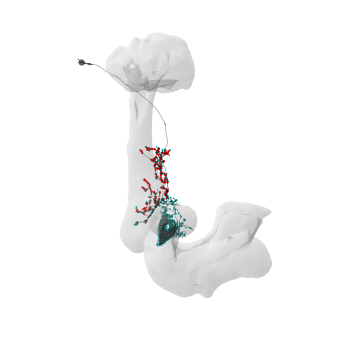

In [20]:
# Make a 2d plot
import matplotlib.pyplot as plt

fig, ax = navis.plot2d(
    [mbon_skeletons[0], mb], c=(0, 0, 0, 0.5), method="3d", connectors=True, lw=0.5
)

# Rotate to top view
ax.elev = -90
plt.show()